# Aman Rohada
* 021230022987
* Machine Learning and Business Applications



# IMPORTING NECESSARY LIBRARIES

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# LOADING THE DATASET

In [48]:
Train_Data=pd.read_csv(r"C:\Users\amanr\Downloads\train.csv", header=0 )

In [49]:
Train_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [50]:
print(Train_Data.dtypes)
print(Train_Data.shape)
print(Train_Data.describe())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean 

# Checking Null Values

In [51]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
Train_Data.isnull().sum().sum()

866

# DISTRIBUTION OF AGE COLUMN

In [53]:
boxplot = Train_Data.boxplot(column=['Age'], return_type='axes')
type(boxplot)

matplotlib.axes._subplots.AxesSubplot

From above box plot we can see there are ouliers present,due to the presence of outliers in the column we will replace the missing values in the 'Age' column with the mode

# HANDLING MISSING VALUES AND REPLACING WITH MODE

In [54]:
Train_Data['Age'].fillna(Train_Data['Age'].mode()[0], inplace=True)

In [55]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
Train_Data.isnull().sum().sum()

689

In [57]:
#Dropping the cabin column 
Train_Data.drop('Cabin', axis=1, inplace=True)

In [58]:
Train_Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [59]:
Train_Data.isnull().sum().sum()

2

# DISTRIBUTION OF SURVIVED COLUMN

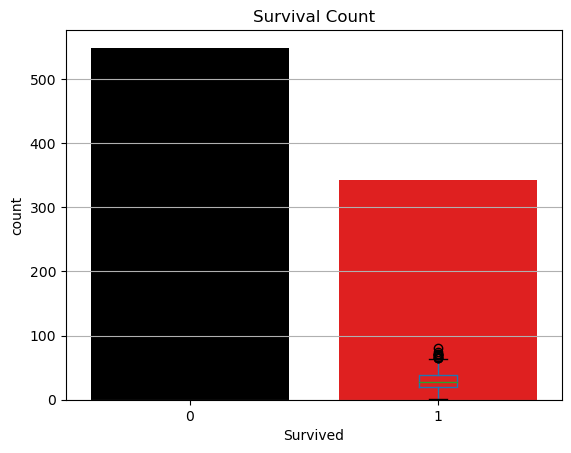

In [60]:
colors =['black','red']
sns.countplot(x='Survived', data=Train_Data, palette=colors)
plt.title('Survival Count')
plt.show()

# Distribution of Age

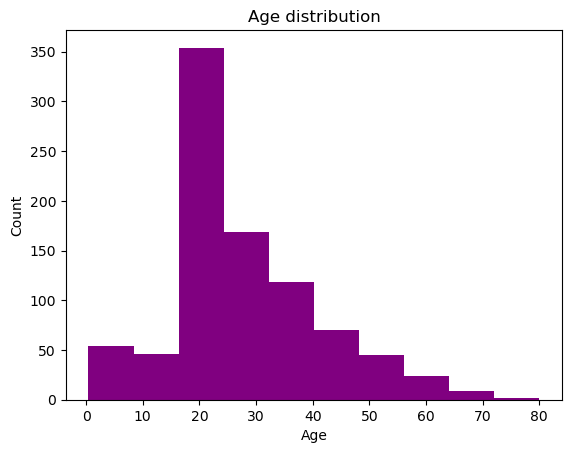

In [61]:
desired_color = 'purple'  
plt.hist(x='Age', data=Train_Data, color=desired_color)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Pclass Column


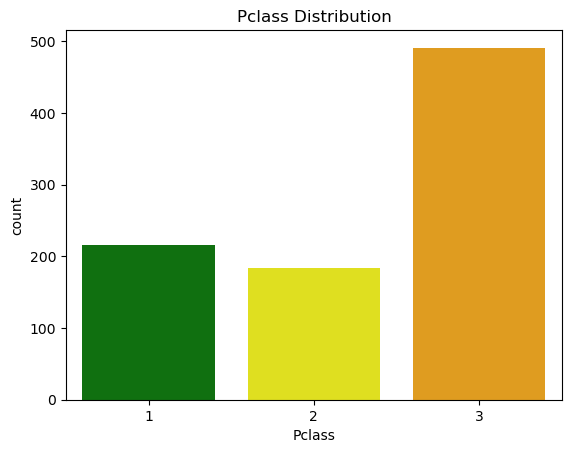

In [62]:
desired_color =['green','yellow','orange'] 
sns.countplot(x='Pclass', data=Train_Data, palette=desired_color)
plt.title('Pclass Distribution')
plt.show()

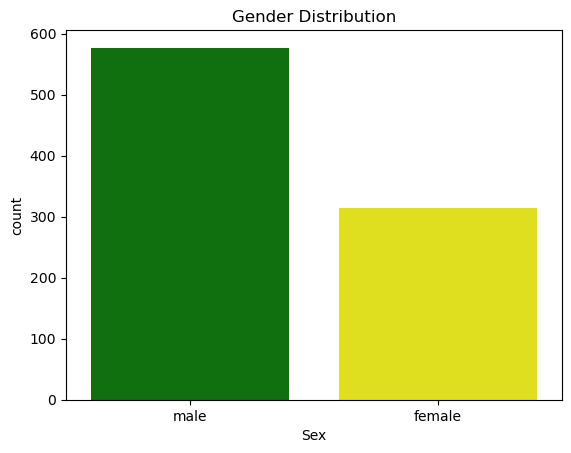

In [63]:
desired_color=['green','yellow']
sns.countplot(x='Sex', data=Train_Data, palette=desired_color)
plt.title('Gender Distribution')
plt.show()

# DATA PROCESSING

In [64]:
Train_Data['Title'] = Train_Data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [65]:
#Checking for Titles with Unique Values in the Name Column

Train_Data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [66]:
#Combining Infrequent Titles as Rare
Infrequent_titles = ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
Train_Data['Title'] = Train_Data['Title'].replace(Infrequent_titles, 'Rare')

In [67]:
#Again checking for Titles with unique values 
Train_Data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

# Converting Categorial Variables into Numerical Variables

In [68]:
Train_Data = pd.get_dummies(Train_Data, columns=['Sex', 'Embarked', 'Title'])

Train_Data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1,0,0


# BUILDING THE MODEL

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
Train_Data_New=Train_Data.copy()

In [71]:
Train_Data_New=Train_Data.copy()

In [72]:
#Defining Features column and target column as X and Y
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
target_col = 'Survived'

# SPLITING THE DATASET INTO TRAINING AND TESTING DATA

In [73]:
x_train, x_test, y_train, y_test = train_test_split(Train_Data_New[feature_cols], Train_Data_New[target_col], test_size = 0.2, random_state=10)

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 15)
(712,)
(179, 15)
(179,)


# USING RANDOM FOREST CLASSIFIER FOR BUILDING THE MODEL

In [84]:
model_used = RandomForestClassifier(n_estimators=100, random_state=42)

model_used.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
#Predicting the testing dataset 
y_test_pred = model_used.predict(x_test)

# Checking model accuracy on the testing dataset

In [94]:
model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.8324022346368715

# From the above we can conclude that the accuracy of the model is approximately 84% so model is said to be good fit

# PREDICTIONS ON TESTING DATASET

In [97]:
Test_Data=pd.read_csv(r"C:\Users\amanr\Downloads\test.csv")

In [98]:
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# DATA PROCESSING

In [99]:
Test_Data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling Missing Values of Age Column

In [102]:
Test_Data['Age'].fillna(Test_Data['Age'].mode()[0], inplace=True)

# Drop the Cabin Column

In [103]:
Test_Data.drop('Cabin', axis=1, inplace=True)

# Replace the Missing Value

In [104]:
#Replacing the missing value of Fare column with median

Test_Data['Fare'].fillna(Test_Data['Fare'].median(), inplace=True)

In [105]:
Test_Data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Obtaining Titles from the Name Column

In [106]:
Test_Data['Title'] = Test_Data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

Test_Data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [109]:
#Combining Infrequent Titles as Rare
Infrequent_titles = ['Dona', 'Rev', 'Dr', 'Ms', 'Col']
Test_Data['Title'] = Test_Data['Title'].replace(Infrequent_titles, 'Rare')

In [110]:
Test_Data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

# Converting Categorial Variables into Numerical Variables

In [112]:
Test_Data = pd.get_dummies(Test_Data, columns=['Sex', 'Embarked', 'Title'])

Test_Data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1,0,0,0,1,0


In [114]:
Test_Data['Survived'] = model_used.predict(Test_Data[feature_cols])

In [115]:
Test_Data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",21.0,0,0,A.5. 3236,8.0500,0,1,0,0,1,0,0,1,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,1,0,0,0,0,0,0,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1,0,0,1,0,0,0
416,1308,3,"Ware, Mr. Frederick",21.0,0,0,359309,8.0500,0,1,0,0,1,0,0,1,0,0,0


# CONCLUSION 
The model appears to perform well on both the training and testing datasets, providing 84% accuracy on the testing data. However, further analysis and evaluation may be needed to assess the model's generalization and robustness to new, unseen data.